In [31]:
##Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [32]:
college_df = pd.read_csv("College+Dataset.csv")

In [33]:
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [34]:
##Convert 'Private' to a categorical column
college_df['Private'] = pd.Categorical(college_df['Private'])

In [35]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

#### Data Preparation

In [36]:
## X-y split
y = college_df['Grad.Rate']
X = college_df.iloc[:, :-1]

In [37]:
# Use dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [38]:
## Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 100)

In [39]:
# Standardize our non-dummy variables
scaler = StandardScaler()
numeric_vars = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 
                'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 
                'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend']
X_train[numeric_vars]= scaler.fit_transform(X_train[numeric_vars])
X_val[numeric_vars]= scaler.transform(X_val[numeric_vars])

### Fitting the k-NN Model

### Q1. Number of Nearest Neighbors


What is the optimal value of the number of nearest neighbors obtained based on the cross-validation approach?

In [40]:
knn_reg = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1,31)} # Parameter range
  
### Write the code for identifying best k

### Q2. RMSE

What is the RMSE obtained on the validation set using the optimal k obtained in the previous question?

In [41]:
#rmse function 
def rmse(y_train, y_pred):
  return np.sqrt(mean_squared_error(y_train, y_pred))

In [42]:
knn_reg2 = KNeighborsRegressor()
param_grid = { 'n_neighbors': np.arange(1, 31) }

In [43]:
# specify the searchand find the best k.
grid = GridSearchCV(knn_reg2, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [44]:
grid_search.best_params_

{'n_neighbors': 19}

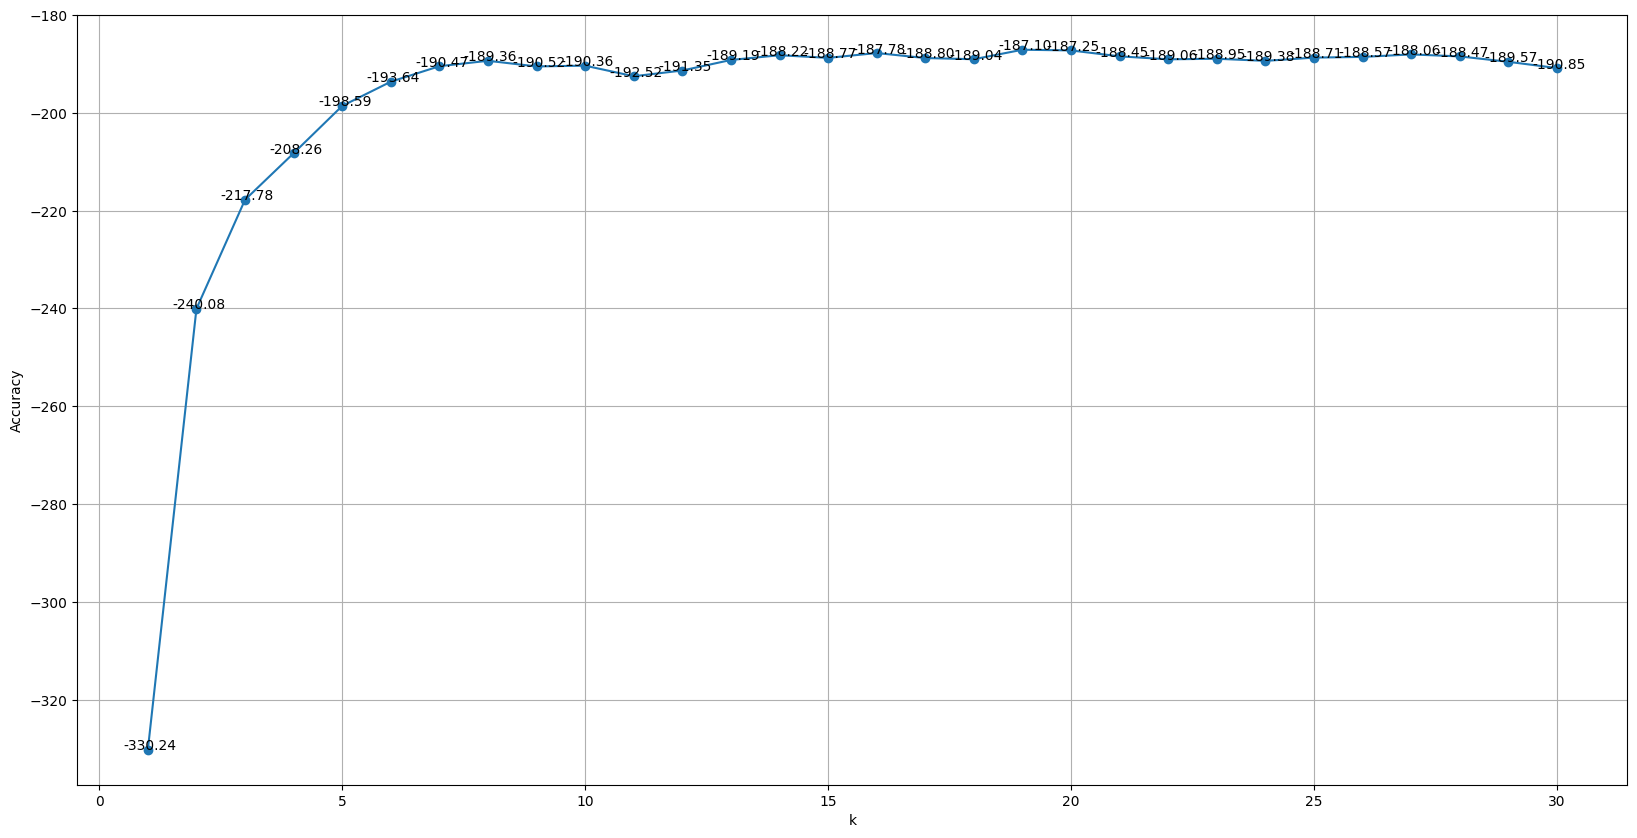

In [51]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure() 
ax = fig.add_subplot(111) 
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'],marker='o') 
plt.xlabel("k")
plt.ylabel("Accuracy") 
plt.grid()
for i,j in zip(param_grid['n_neighbors'],grid_search.cv_results_['mean_test_score']):
    ax.annotate('%.2f' % j,xy=(i-0.5,j+0.01))
    # print("The maximum accuracy is obtained at k = " + str(np.argmax(val_acc)+1))

In [57]:
print("The best value of k is: ", str(np.argmax(grid_search.cv_results_['mean_test_score']+1)))

The best value of k is:  18


In [60]:
knn_reg_best = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_reg_best.fit(X_train, y_train)
y_pred = knn_reg_best.predict(X_val)

In [61]:
print("RMSE on the validation data: ", round(rmse(y_val, y_pred), 3))

RMSE on the validation data:  12.516


In [62]:
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

knn_reg_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_reg_best.fit(X_train, y_train)
print('RMSE test set:', round(rmse(y_val, knn_reg_best.predict(X_val)), 3))

RMSE test set: 15.356
